<a href="https://colab.research.google.com/github/MichaelDeyid/Ejercicios/blob/main/Punto2_2_primer_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

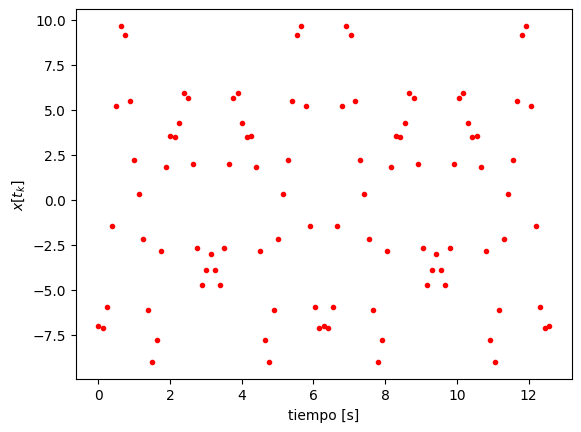

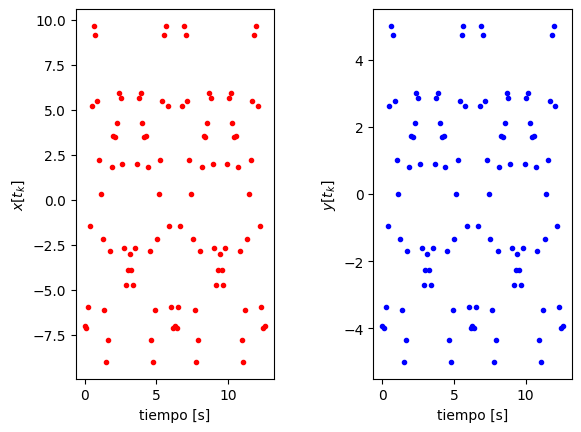

(101,)


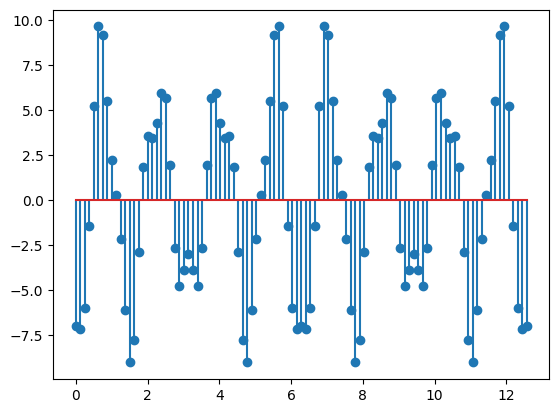

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

T= 2*np.pi # periodo de la señal
Fr= 1/T # frecuencia de la señal
Fs = 50*Fr # al menos "2" veces más grande por Nyclicks
Ts= 1/Fs # tiempo de muestreo
ti = 0 # tiempo inicial para este caso
tf= 2*T  # porque queremos 2 ciclos ( es lo solicitado )
t=np.arange(ti,tf,Ts) # Vector de datos del tiempo
i=7*np.sin(4*t-np.pi/2)-2*np.cos(5*t)+2*np.cos(10*t) # Vector de amplitud

y_min = -5 # valor min después de cero y pendiente
y_max = 5 # valor max después de cero y pendiente
#crear funcion en python

def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c

  return yv

yv = my_ceropen(i,ymin=-5,ymax=5)



#cuantizacion

#número de bits y vector de cuantización
nbits = 3
rmin = -5
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) # Vector de cuantización

#distancias y cero pendiente a vector cuantizacion
d= cdist(yv.reshape(-1,1), ve.reshape(-1,1))
d.shape




plt.plot(t,i,'r.') #vector en eje horizontal, vector eje vertical, color y marcador
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')
plt.show() #mostrar gráfica


#acondicionar señal

plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(t,i,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(t,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.5,wspace=0.5) #ajustar espaciado entre gráficas
plt.show()


plt.stem(t,i)

print(yv.shape)


In [33]:
ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila

In [34]:
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [35]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(yv.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(yv[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(yv[i],ve)) #apilar datos cuantizando si i>0

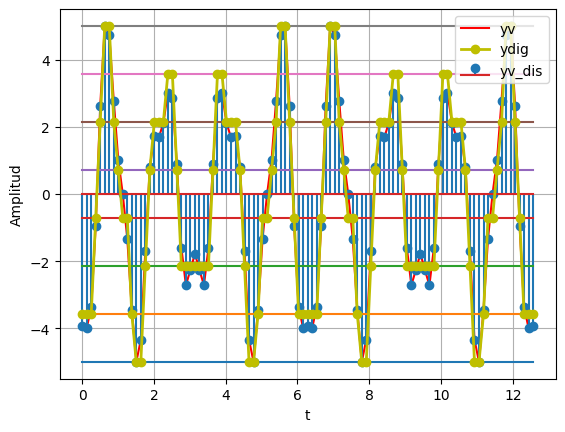

In [36]:
#graficar señales

plt.plot(t,yv,c='r', label='yv')#cs continua

plt.stem(t,yv, label='yv_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(t,v*np.ones(len(t)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(t,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()